In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from numpy.linalg import cond, norm, inv

from rbf import *
from halton import *

In [2]:
matplotlib.rcParams.update({'font.size': 20})

In [3]:
def foo(x):
    return np.exp(-x*np.cos(10*np.pi*x))

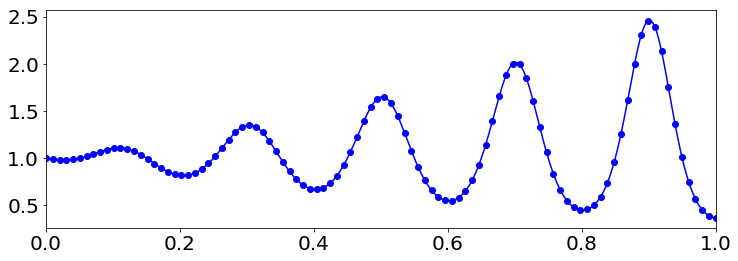

In [4]:
n = 100
m = 1000

xs = np.linspace(0, 1, n)
zs = np.linspace(0, 1, m)

fig = plt.figure(figsize=(12,4))
plt.plot(zs, foo(zs), 'b-')
plt.plot(xs, foo(xs), 'bo')
plt.xlim(0, 1)
plt.show()

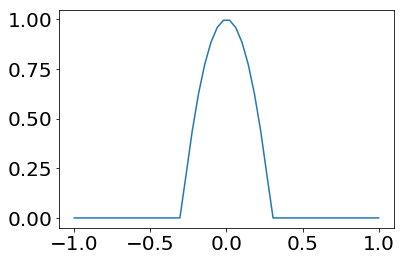

In [5]:
def phi(r, d):
    ret = (1-(r/d)**2)
    return ret*(ret>0)

delta = .3

plt.figure()
plt.plot(np.linspace(-1, 1), phi(np.linspace(-1,1), delta))
plt.show()

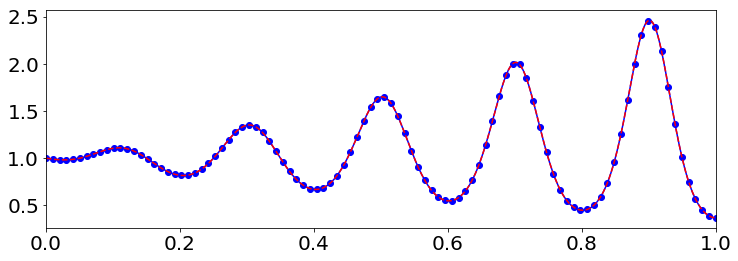

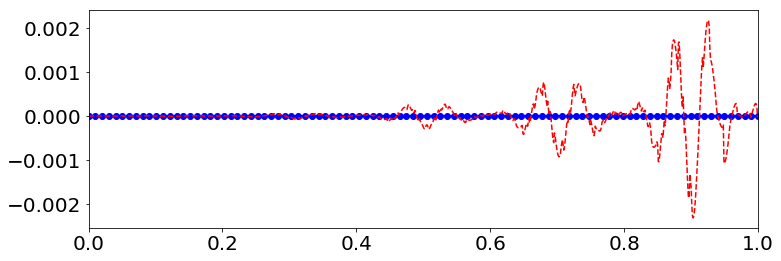

In [6]:
delta = .1
deg = 15

us = np.zeros(zs.shape)
for i, x in enumerate(zs):
    mask = phi(xs-x,delta)>0
    stencil = xs[mask]
    w = phi(stencil-x, delta)

    A = np.vander(stencil-x, deg+1, increasing=True)

    c = la.lstsq(A*w[:,np.newaxis], foo(stencil)*w, rcond=None)[0]

    us[i] = c[0]

fig = plt.figure(figsize=(12,4))
plt.plot(zs, foo(zs), 'b-')
plt.plot(xs, foo(xs), 'bo')
plt.plot(zs, us, 'r--')
plt.xlim(0, 1)
plt.show()

fig = plt.figure(figsize=(12,4))
plt.plot(zs, 0*foo(zs), 'b-')
plt.plot(xs, 0*foo(xs), 'bo')
plt.plot(zs, us-foo(zs), 'r--')
plt.xlim(0, 1)
plt.show()

# 1D Derivatives

In [16]:
def foo(x):
    return np.sin(2*np.pi*x)

def dfoo(x):
    return 2*np.pi*np.cos(2*np.pi*x)

def phi(r, d):
    ret = (1-(r/d)**2)
    return ret*(ret>0)

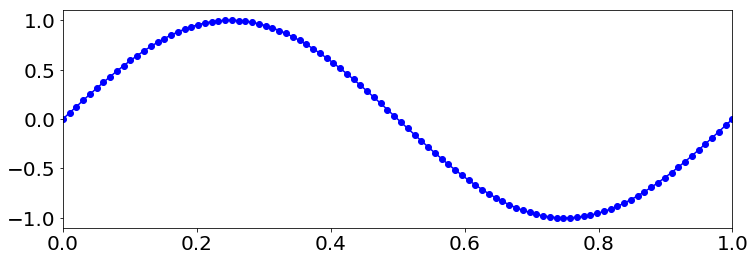

In [17]:
n = 100
m = 1000

xs = np.linspace(0, 1, n)
zs = np.linspace(0, 1, m)

fig = plt.figure(figsize=(12,4))
plt.plot(zs, foo(zs), 'b-')
plt.plot(xs, foo(xs), 'bo')
plt.xlim(0, 1)
plt.show()

# 2D

In [7]:
def foo(x,y):
    return np.cos(3*np.pi*x)*y**2

In [8]:
n = 50
m = 20

In [9]:
nodes = halton_sequence(1,n,2).T
X, Y = np.meshgrid(np.linspace(0,1,m), np.linspace(0,1,m))

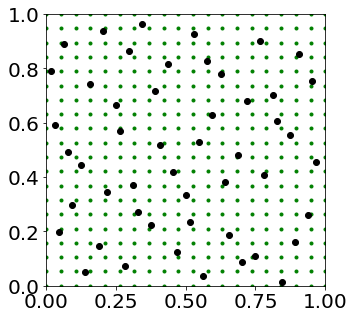

In [10]:
fig = plt.figure(figsize=(5,5))
plt.plot(X, Y, 'g.')
plt.plot(nodes[:,0], nodes[:,1], 'ko')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

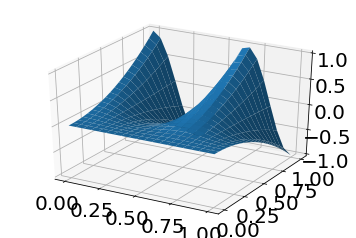

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, foo(X, Y))
plt.show()

In [12]:
def phi(r, d):
    ret = (1-(r/d)**2)
    return ret*(ret>0)

def dist(x, y, x0, y0):
    return np.sqrt((x-x0)**2 + (y-y0)**2)

delta = .3

In [13]:
xs, ys = X.flatten(), Y.flatten()
us = np.zeros(xs.shape)
for i, (x, y) in enumerate(zip(xs, ys)):
    mask = phi(dist(x, y, nodes[:,0], nodes[:,1]), delta)>0
    stencil_x = xs[mask]
    stencil_y = ys[mask]
    w = phi(dist(x, y, stencil_x, stencil_y), delta)

#     A = np.vander(stencil-x, deg+1, increasing=True)

#     c = la.lstsq(A*w[:,np.newaxis], foo(stencil)*w, rcond=None)[0]

#     us[i] = c[0]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 400 but corresponding boolean dimension is 50

In [ ]:
xs.shape